In [1]:
# !pip install pyreadr

# Morant Consultores - Evaluación Inicial


---

> Resuelto por: *Arturo Bravo Reynaga*

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr

sns.set(style="darkgrid")

# Problema 1

Descargue la base de datos electoral ubicada en data/electoral.rda. La base de datos contiene las variables casillas, partido_a, partido_b, partido_c, votos_total, lista_nominal y corresponden a datos de una elección ficticia. Suponga que tiene que reportar a un cliente los resultados de la elección.

Elija la información que reportaría e inclúyala en el R markdown donde entregará sus respuestas. El reporte puede incluir, pero no necesariamente limitarse a comunicar: en qué lugar quedó cada partido, el número de casillas en las que resultó ganador cada partido, una descripción de la participación ciudadana.

Para reportar puede utilizar texto, gráficas, mapas o tablas. Recuerde que un mejor reporte es aquel que tiene mayor contenido de relevancia con la menor cantidad de elementos. Si requiere de un mapa, puede utilizar el ubicado en data/mapa.rda. Para esto deberá tener instalado el paquete sf.

In [3]:
result = pyreadr.read_r('electoral.rda')
df = result[None]

# casteamos nuestras columnas a valores enteros ya que ningún valor contiene
# decimales
df = df.astype({
    "casilla": "int",
    "partido_a": "int",
    "partido_b": "int",
    "partido_c": "int",
    "votos_total": "int",
    "lista_nominal": "int",
    })

df = df.astype({"casilla": "str"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   casilla        50 non-null     object
 1   partido_a      50 non-null     int64 
 2   partido_b      50 non-null     int64 
 3   partido_c      50 non-null     int64 
 4   votos_total    50 non-null     int64 
 5   lista_nominal  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [4]:
df["nulos_otros_partidos"] = df["votos_total"] - df["partido_a"] - df["partido_b"] - df["partido_c"]

In [5]:
df.head()

,casilla,partido_a,partido_b,partido_c,votos_total,lista_nominal,nulos_otros_partidos
0,1,174,355,556,1313,1837,228
1,2,170,349,505,1270,1777,246
2,3,273,399,758,1680,2481,250
3,4,100,473,471,1294,2250,250
4,5,40,337,142,557,828,38


## Resultados generales de la elección

A continuación observamos los resultados generales de la elección, los cuales muestran el lugar en el que quedó cada partido y la participación que se tuvo en la elección.

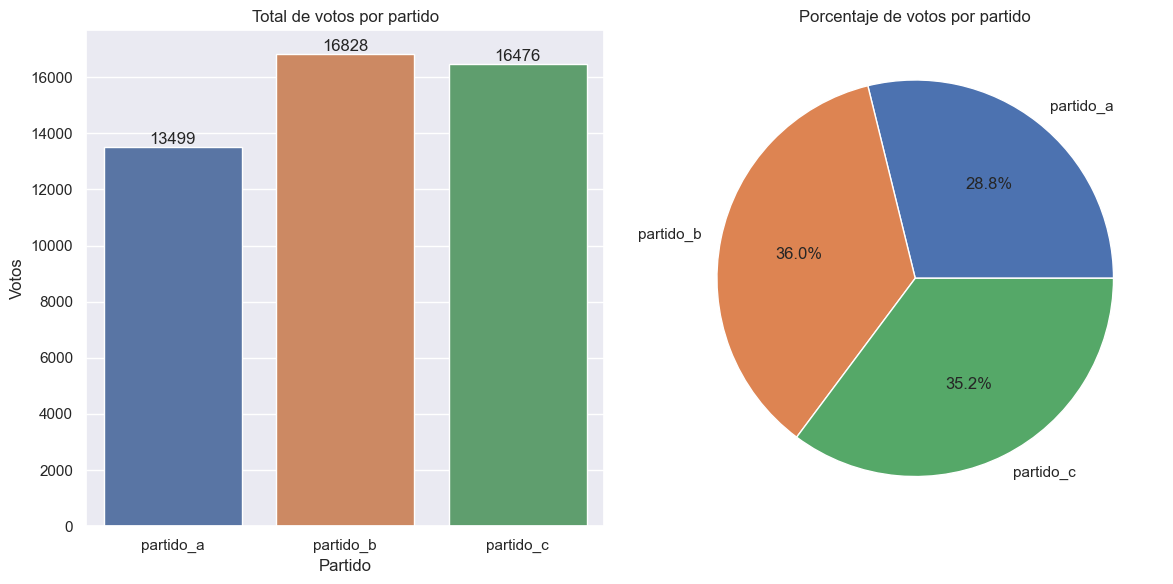

In [6]:
# Calcular el total de votos por partido
total_votos = df[['partido_a', 'partido_b', 'partido_c']].sum()

# Calcular el porcentaje de votos por partido
porcentaje_votos = total_votos / df['votos_total'].sum() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1: Total de votos por partido
sns.barplot(ax=axes[0], x=total_votos.index, y=total_votos.values)
axes[0].set_title('Total de votos por partido')
axes[0].set_xlabel('Partido')
axes[0].set_ylabel('Votos')

for i, valor in enumerate(total_votos.values):
  axes[0].text(i, valor, str(valor), ha='center', va='bottom')

# Gráfica 2: Porcentaje de votos por partido
axes[1].pie(porcentaje_votos.values, labels=porcentaje_votos.index, autopct='%1.1f%%')
axes[1].set_title('Porcentaje de votos por partido')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Observamos que *partido_b* ganó la elección con 16,828 votos (36.0%) contra los 16,476 (35.2%) votos del *partido_c*, teniendo una margen de victoria de sólamente 0.8%. El *partido_a* se quedó atrás con 13,499 (28.8%).

## Participación ciudadana

La participación ciudadana nos ayuda a ver el grado de involucramiento de la población en el proceso electoral. Una alta participación puede ser un indicador de una democracia saludable y de la confianza de los ciudadanos en el sistema político. Por otro lado, una baja participación puede indicar desinterés, desconfianza o apatía respecto a la elección.

In [7]:
participacion_general = (df["votos_total"].sum() / df["lista_nominal"].sum()) * 100
print(f'{participacion_general:.2f}%')

64.00%


Una participación del 64% indica que una proporción significativa de la población elegible para votar decidió ejercer su derecho y responsabilidad cívica. Esto sugiere un nivel razonable de interés y compromiso ciudadano en la elección.

In [8]:
df["participacion"] = df["votos_total"] / df["lista_nominal"]

df_sorted_by_participacion = df.sort_values('participacion', ascending=False)
df_sorted_by_participacion[["casilla", "participacion"]].head()

,casilla,participacion
35,36,0.723502
13,14,0.719938
29,30,0.716236
0,1,0.714752
1,2,0.714688


Observamos que las casillas 36, 14, 30, 1 y 2 son las casillas con mayor participación ciudadana con más del 71.46% de participación

In [9]:
df_sorted_by_participacion[["casilla", "participacion"]].tail()

,casilla,participacion
3,4,0.575111
10,11,0.554987
43,44,0.535351
9,10,0.526916
18,19,0.513966


De igual manera, observamos que las casillas 4, 11, 44, 10 y 19 son las casillas con menor participación ciudadana, la última con una participación de apenas 51.39%

## Ganadores por casillas

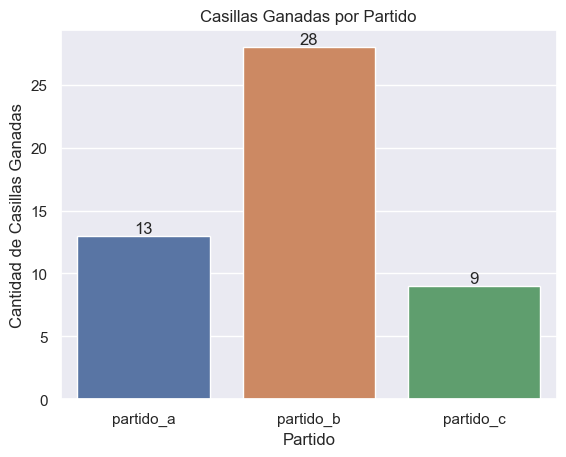

In [10]:
# Calcular el partido ganador en cada casilla
df['ganador'] = df[['partido_a', 'partido_b', 'partido_c']].idxmax(axis=1)

# Contar cuántas casillas ganó cada partido
ganadores_por_partido = df['ganador'].value_counts().sort_index()

data = pd.DataFrame({
    'Partido': ganadores_por_partido.index,
    'Casillas Ganadas': ganadores_por_partido.values
})


sns.barplot(data=data, x='Partido', y='Casillas Ganadas')
plt.xlabel('Partido')

for index, row in data.iterrows():
    plt.annotate(str(row['Casillas Ganadas']),
                 xy=(index, row['Casillas Ganadas']),
                 ha='center', va='bottom')


plt.ylabel('Cantidad de Casillas Ganadas')
plt.title('Casillas Ganadas por Partido')
plt.show()

Notamos que *partido_b* ganó en 28 casillas computadas, y aunque *partido_c* perdió por un margen menor al 1% la elección, vemos que ganó sólamente en 9 de 50 casillas computadas. De hecho, notamos que *partido_c* al ser el claro competidor de *partido_b*, en términos de casillas computadas, obtuvo 4 menos que *partido_a* que en totalidad de votos, quedó en tercer lugar por un margen considerable.


Lo que vuelve interesante la siguiente gráfica:

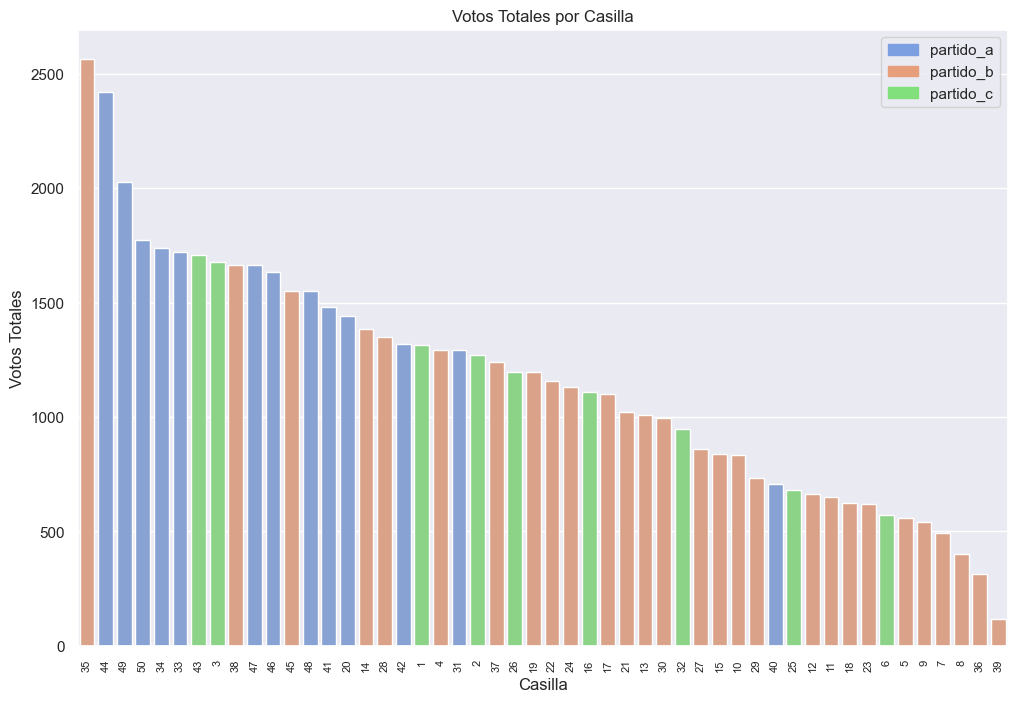

In [11]:
df_sorted = df.sort_values('votos_total', ascending=False)

plt.figure(figsize=(12, 8))

colores = {'partido_a': '#7b9fe0', 'partido_b': '#e79f7b', 'partido_c': '#81e07b'}

sns.barplot(data=df_sorted, x='casilla', y='votos_total', hue='ganador', palette=colores, dodge=False)

# Crear el cuadro de leyenda con los colores de cada partido
legend_labels = list(colores.keys())
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colores[key]) for key in legend_labels]
plt.legend(legend_handles, legend_labels)

plt.title('Votos Totales por Casilla')
plt.xlabel('Casilla')
plt.ylabel('Votos Totales')

plt.xticks(rotation=90, fontsize=8)

plt.show()

Podemos observar en el gráfico que *partido_b* ganó la mayoría de las casillas con menos votos y que fue suficiente para ganarle a los otros dos partidos.

Además, notamos que *partido_a* ganó más de las casillas con más votos, sin embargo, perdió en su totalidad contra *partido_c* y esto se debe a que las victorias que tuvo *partido_c* fueron más claras que aquellas que obtuvo *partido_a*. Es decir, *partido_c* tiene una mayor consolidación en aquellas casillas donde fue triunfador.

## Resultados por partido

Como hemos visto en el presente análisis, el resultado de la elección ha sido bastante interesante y los partidos tuvieron rendimientos distintos. Por ejemplo, *partido_b*, que ganó la elección tuvo un gran rendimiento en casillas donde las listas nominales eran más chicas. *partido_a*, quien tuvo un rendimiento muy bueno en casillas "grandes", se quedó en último lugar. Por esto es interesante análisis el rendimiento en la elección de manera individual.

### Partido A

*partido_a* quedó en 3er lugar en la elección, sin embargo, tuvo más casillas ganadas que *partido_c*, y las casillas donde ganó, tenían listas nominales más grandes que las que ganaron *partido_c* y *partido_b. Por lo anterior, es interesante indagar un poco más en el rendimiento de *partido_a* en la elección.

Primero, observamos en cuántas casillas *partido_a* quedó en primero, en segundo y en tercer lugar.

In [12]:
partido_a_primer_lugar = df[(df['partido_a'] > df['partido_b']) & (df['partido_a'] > df['partido_c'])]
partido_a_segundo_lugar = df[((df['partido_a'] < df['partido_b']) & (df['partido_a'] > df['partido_c'])) |
                              ((df['partido_a'] < df['partido_c']) & (df['partido_a'] > df['partido_b']))]
partido_a_tercer_lugar = df[(df['partido_a'] < df['partido_b']) & (df['partido_a'] < df['partido_c'])]

df_podio = pd.DataFrame({
    'partido': ['partido_a'],
    'primer_lugar': [partido_a_primer_lugar.shape[0]],
    'segundo_lugar': [partido_a_segundo_lugar.shape[0]],
    'tercer_lugar': [partido_a_tercer_lugar.shape[0]]
}).set_index('partido')

df_podio.loc['partido_a']

primer_lugar     13
segundo_lugar     5
tercer_lugar     32
Name: partido_a, dtype: int64

Podemos observar que, *partido_a* obtuvo un tercer lugar en 32 de las 50 casillas computadas, lo que hace sentido con que haya quedado en último lugar.

In [13]:
partido_a_primer_lugar

,casilla,partido_a,partido_b,partido_c,votos_total,lista_nominal,nulos_otros_partidos,participacion,ganador
19,20,392,356,245,1442,2369,449,0.608696,partido_a
30,31,326,290,216,1293,1962,461,0.659021,partido_a
32,33,558,352,536,1721,2476,275,0.695073,partido_a
33,34,642,403,463,1738,2513,230,0.691604,partido_a
39,40,238,234,135,708,998,101,0.709419,partido_a
40,41,440,371,419,1480,2341,250,0.632208,partido_a
41,42,424,312,352,1318,1973,230,0.668018,partido_a
43,44,800,560,762,2423,4526,301,0.535351,partido_a
45,46,565,442,363,1633,2711,263,0.602361,partido_a
46,47,648,321,432,1664,2807,263,0.592804,partido_a


In [14]:
margen_victoria = (partido_a_primer_lugar["partido_a"] - partido_a_primer_lugar[["partido_b", "partido_c"]].max(axis=1)).sum()
print(f"El margen de victoria total fue: {margen_victoria}")

El margen de victoria total fue: 925


Vemos que en las casillas que ganó *partido_a*, sólamente obtuvo un margen de victoria de 925 votos. Es decir, tuvo un margen de victoria estrecho y considerando que perdió en la mayoría de casillas, se entiende su tercer lugar en la elección.

### Partido B

*partido_b* quedó en 1er lugar en la elección y aunque no ganó las casillas con mayor cantidad de votos, fue el que ganó más casillas. Veamos su rendimineto en la elección

In [15]:
partido_b_primer_lugar = df[(df['partido_b'] > df['partido_a']) & (df['partido_b'] > df['partido_c'])]
partido_b_segundo_lugar = df[((df['partido_b'] < df['partido_a']) & (df['partido_b'] > df['partido_c'])) |
                              ((df['partido_b'] < df['partido_c']) & (df['partido_b'] > df['partido_a']))]
partido_b_tercer_lugar = df[(df['partido_b'] < df['partido_a']) & (df['partido_b'] < df['partido_c'])]

df_podio.loc['partido_b'] = [
    partido_b_primer_lugar.shape[0],
    partido_b_segundo_lugar.shape[0],
    partido_b_tercer_lugar.shape[0]
]

df_podio.loc['partido_b']

primer_lugar     27
segundo_lugar    12
tercer_lugar     10
Name: partido_b, dtype: int64

Observamos que *partido_b* ganó en 27 casillas, en 12 quedó en segundo lugar y
en 10 quedó en tercer lugar.

In [16]:
margen_victoria = (partido_b_primer_lugar["partido_b"] - partido_b_primer_lugar[["partido_a", "partido_c"]].max(axis=1)).sum()
print(f"El margen de victoria total fue: {margen_victoria}")

El margen de victoria total fue: 1842


Observamos que el margen de victoria de *partido_b* es el mayor de los tres partidos. Aunque tuvo más terceros lugares que *partido_c*, el tener un mayor margen de victoria consolidó su victoria en la elección.

### Partido C

*partido_c* quedó en segundo lugar en la elección por menos del 1% de los votos totales. Sin embargo, observamos que no ganó tantas casillas electorales, lo que llevó a *partido_c* a estar tan cerca de la victoria, fue que en muchas casillas se mantuvo en competencia al quedar en segundo lugar.

In [17]:
partido_c_primer_lugar = df[(df['partido_c'] > df['partido_a']) & (df['partido_c'] > df['partido_b'])]
partido_c_segundo_lugar = df[((df['partido_c'] < df['partido_a']) & (df['partido_c'] > df['partido_b'])) |
                              ((df['partido_c'] < df['partido_b']) & (df['partido_c'] > df['partido_a']))]
partido_c_tercer_lugar = df[(df['partido_c'] < df['partido_a']) & (df['partido_c'] < df['partido_b'])]

df_podio.loc['partido_c'] = [
    partido_c_primer_lugar.shape[0],
    partido_c_segundo_lugar.shape[0],
    partido_c_tercer_lugar.shape[0]
]

df_podio.loc['partido_c']

primer_lugar      9
segundo_lugar    32
tercer_lugar      8
Name: partido_c, dtype: int64

In [18]:
margen_victoria = (partido_c_primer_lugar["partido_c"] - partido_c_primer_lugar[["partido_a", "partido_b"]].max(axis=1)).sum()
print(f"El margen de victoria total fue: {margen_victoria}")

El margen de victoria total fue: 1095


In [21]:
# Crear el archivo XLSX
with pd.ExcelWriter('data.xlsx') as writer:
    df.to_excel(writer, sheet_name='data', index=False)
    df_podio.to_excel(writer, sheet_name='podio', index=True)

## Conclusiones



1.   El triunfador de la elección fue *partido_b* por un margen menor al 1%, es decir, se tuvo una elección reñida.
2.   El porcentaje de participación fue de casi de 65%, teniendo en cuenta los datos de participación de [paises como Estados Unidos o Suiza, se considera una participación saludable](https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1665-05652011000200008).
3.   En número de casillas, *partido_b* fue el que más casillas ganó, sin embargo, la mayoría de las casillas que ganó fueron casillas donde la cantidad de votos no era tan grande, comparadas con las que ganaron *partido_a* y *partido_c*, haciendo la elección más cerrada
4.   Aunque *partido_a* ganó más casillas que *partido_c*, el haber tenido tantos resultados en tercer lugar, hizo que se alejara de la victoria.
